# thal2 2:1 Bifurcation Diagrams

# Inits

In [177]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import thal2 as t2

from lib.util import (get_phase, freq_est, get_tongue_1d, pl_exist_1d, 
get_period, bif1d, follow_phase_diffs, phase_lock_r3d, follow_locking_3d)

from lib.rhs import _redu_c,_full
from lib.rhs import _redu_3dc_thal as _redu_3dc

from lib.plot_util import (add_diagram_1d_scatter, quick_plot_combined, 
quick_plot_r,draw_full_solutions)

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [178]:
kw_sim = {'rtol':1e-7,'atol':1e-7,'method':'LSODA'}

In [179]:
pd1 = {'gL':0.05,'gna':3,'gk':5,
       'gt':5,'eL':-70,'ena':50,
       'ek':-90,'et':0,'esyn':-1,
       'c':1,'alpha':3,'beta':2,
       'sigmat':0.8,'vt':-20,
       'ib':3.5,'del':0,'om':1,'om_fix':1}

In [180]:
# default period must be 2*np.pi
kws1 = {'var_names':['v','h','r','w'],
        'pardict':pd1,
        'rhs':t2.rhs,
        'coupling':t2.coupling,
        'init':np.array([-.64,0.71,0.25,0,6]),
        'TN':20000,
        'trunc_order':3,
        'z_forward':False,
        'i_forward':[False,True,False,False,False,False],
        'i_bad_dx':[False,True,False,False,False,False],
        'max_iter':50,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':.5}

## Defs

In [181]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-7,'atol':1e-7}

In [182]:
etup21 = (.001,.1,100)
eps_list12r = np.linspace(*etup21)

In [183]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [184]:
system1 = rsp(idx=0,model_name='thal0_35',**kws1)
system2 = rsp(idx=1,model_name='thal1_35',**kws1)

mkdir ./data/thal0_35/
* Loading LC data...
self.T 6.283185307179586 omfix 1.6947246128737048
* Loading monodromy...
* Floquet Exponent kappa =-0.03594482780785962
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...
mkdir ./data/thal1_35/
* Loading LC data...
self.T 6.283185307179586 omfix 1.6947246128737048
* Loading monodromy...
* Floquet Exponent kappa =-0.03594482780785962
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [185]:
kw_nm = {'system1':system1,'system2':system2,'_n':('om0',2),'_m':('om1',1),
        'NH':1024,'save_fig':False}

# del=0.0

In [186]:
del21_p0 = 0
a21_p0 = nm.nmCoupling(**kw_nm, del1=del21_p0)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


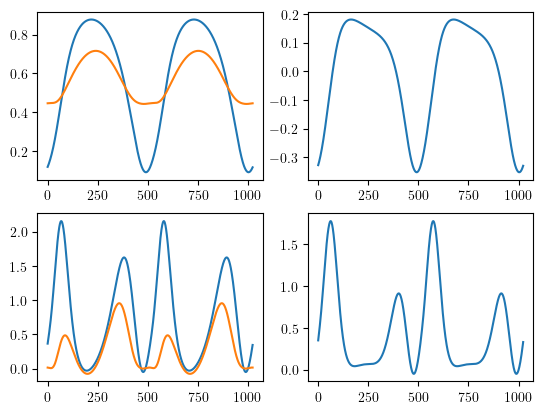

In [187]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(a21_p0.system1.h['dat'][0])
axs[0,0].plot(a21_p0.system2.h['dat'][0])

axs[0,1].plot(a21_p0.system1.h['dat'][0]-a21_p0.system2.h['dat'][0])

axs[1,0].plot(a21_p0.system1.h['dat'][1])
axs[1,0].plot(a21_p0.system2.h['dat'][1])

axs[1,1].plot(a21_p0.system1.h['dat'][1]-a21_p0.system2.h['dat'][1])

## Get Branches Full

In [188]:
kw_p0 = {'a':a21_p0,'del1':del21_p0,'recompute':False,
         'bifdir':'bif1d_thal2/','_full_rhs':_full}

In [189]:
data_p0_list = []

In [190]:
in_dicts = [dict(init=1,eps_init=0.1,eps_final=0.009,deps=-.01),
            dict(init=1,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [191]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p0)
    data_p0_list.append(dat)

fname1 td_branch_init=1_nm=21_del=0_ei=0.1_ef=0.009_de=-0.01.txt
fname2 ts_branch_init=1_nm=21_del=0_ei=0.1_ef=0.009_de=-0.01.txt
fname1 td_branch_init=1_nm=21_del=0_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=1_nm=21_del=0_ei=0.01_ef=0.0005_de=-0.001.txt


In [192]:
# save hyperparameters
fname = kw_p0['bifdir']+'hyper_thal2_21_p0.txt'
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [193]:
data_r3d_p0_list = []

In [194]:
# find init for this branch mid
_,init = phase_lock_r3d([5,0,0],a21_p0,.01,_redu_3dc)
print(init)

t_diff 4.80598757406685813, Y=[ 4.80598757  0.01412435 -0.04102587]                                              
[ 4.806   0.0141 -0.041 ]


In [195]:
# f
dat = follow_locking_3d(init,a21_p0,(.01,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [196]:
# b
dat = follow_locking_3d(init,a21_p0,(.01,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

## Plot

eps_min 0.007000000000000003


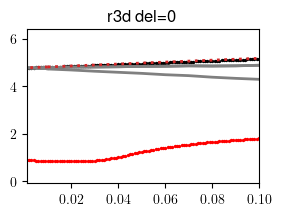

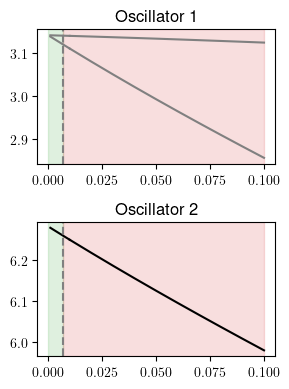

In [197]:
quick_plot_combined(a21_p0,
                    kw_f={'data_list':data_p0_list},
                    kw_r3d={'data_list':data_r3d_p0_list},
                    kw_r={'etup':etup21})

## Sims

In [198]:
eps21_p0 = 0.1
th_init21_p0 = 3

In [199]:
dt = .01;T_p0=500
t21_p0 = np.arange(0,T_p0,dt)
args21_p0 = {'args':(a21_p0,eps21_p0,del21_p0),
               't_eval':t21_p0,**kw_sim}

In [200]:
y0a = a21_p0.system1.lc['dat'][int((th_init21_p0/(2*np.pi)) * a21_p0.system1.TN),:]
y0b = a21_p0.system2.lc['dat'][int((0/(2*np.pi)) * a21_p0.system2.TN),:]

y0_p0 = np.array([y0a,y0b]).flatten()

solf21_p0 = solve_ivp(_full,[0,t21_p0[-1]],
                        y0_p0, **args21_p0)

In [201]:
solr21_p0 = solve_ivp(_redu_c,[0,t21_p0[-1]],
                        [th_init21_p0],**args21_p0)

In [202]:
# solr12b_p0 = solve_ivp(_redu_3dc,[0,t21_p0[-1]],
#                     [th_init21_p0,0,0],**args21_p0)

In [203]:
tpa21_p0, phasea21_p0 = get_phase(t21_p0,solf21_p0.y.T[:,:4],
                            skipn=50,system1=a21_p0.system1)
tpb21_p0, phaseb21_p0 = get_phase(t21_p0,solf21_p0.y.T[:,4:],
                            skipn=50,system1=a21_p0.system2)

### Plot

(-0.5, 6.783185307179586)

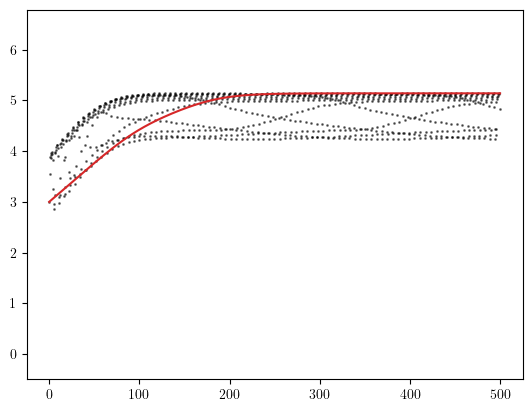

In [204]:
fig,axs = plt.subplots()
y = np.mod(phasea21_p0 - a21_p0.om*phaseb21_p0,2*np.pi)
axs.scatter(tpa21_p0,y,s=1,alpha=.5,color='black')

axs.plot(t21_p0,np.mod(solr21_p0.y.T,2*np.pi),color='tab:red')

# axs.plot(t21_p0*a21_p0.om,np.mod(solr12b_p0.y[0]-a21_p0.om*solr12b_p0.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

(250.0, 350.0)

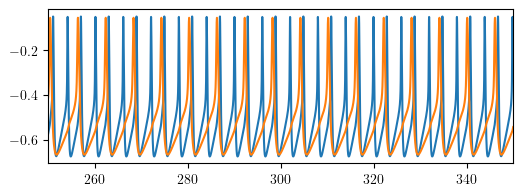

In [205]:
fig,axs = plt.subplots(figsize=(6,2))
axs.plot(solf21_p0.t,solf21_p0.y.T[:,0])
axs.plot(solf21_p0.t,solf21_p0.y.T[:,4])
axs.set_xlim(250,350)

# del=0.001

In [206]:
del21_p001 = .001
a21_p001 = nm.nmCoupling(**kw_nm, del1=1*del21_p001)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


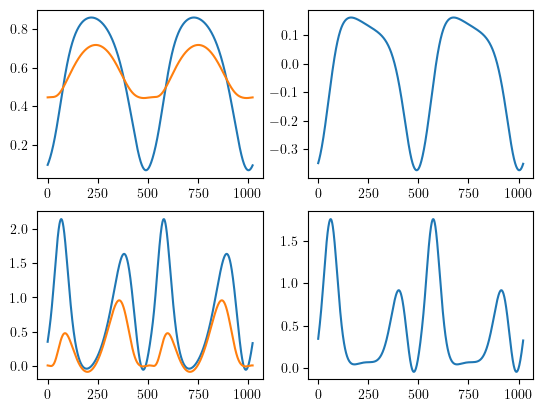

In [207]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(a21_p001.system1.h['dat'][0])
axs[0,0].plot(a21_p001.system2.h['dat'][0])

axs[0,1].plot(a21_p001.system1.h['dat'][0]-a21_p001.system2.h['dat'][0])

axs[1,0].plot(a21_p001.system1.h['dat'][1])
axs[1,0].plot(a21_p001.system2.h['dat'][1])

axs[1,1].plot(a21_p001.system1.h['dat'][1]-a21_p001.system2.h['dat'][1])

## Get Branches Full

In [208]:
kw_p001 = {'a':a21_p001,'del1':del21_p001,'bifdir':'bif1d_thal2/',
            '_full_rhs':_full,'recompute':False}

In [209]:
data_p001_list = []

In [210]:
in_dicts = [dict(init=2,eps_init=0.02,eps_final=0.0005,deps=-.001),
            dict(init=2,eps_init=0.02,eps_final=0.11,deps=.01),
            dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001),
            dict(init=0,eps_init=0.02,eps_final=0.11,deps=.01)]

In [211]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p001)
    data_p001_list.append(dat)
fname = kw_p001['bifdir']+'hyper_thal2_21_p001.txt'

fname1 td_branch_init=2_nm=21_del=0.001_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=2_nm=21_del=0.001_ei=0.02_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=2_nm=21_del=0.001_ei=0.02_ef=0.11_de=0.01.txt
fname2 ts_branch_init=2_nm=21_del=0.001_ei=0.02_ef=0.11_de=0.01.txt
fname1 td_branch_init=0_nm=21_del=0.001_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0_nm=21_del=0.001_ei=0.02_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=0_nm=21_del=0.001_ei=0.02_ef=0.11_de=0.01.txt
fname2 ts_branch_init=0_nm=21_del=0.001_ei=0.02_ef=0.11_de=0.01.txt


In [212]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [213]:
data_r3d_p001_list = []

In [214]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a21_p001,.1,_redu_3dc)
print(init)

t_diff 5.10076405410278809, Y=[ 5.10076405  0.16325297 -0.44833218]                                              
[ 5.1008  0.1633 -0.4483]


In [215]:
# top 1b
dat = follow_locking_3d(init,a21_p001,(.1,.001,-.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p001_list.append(dat)

## Plot

eps_min 0.006999999999999989


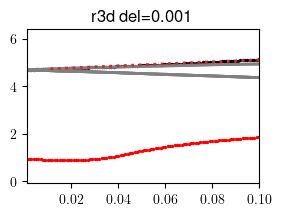

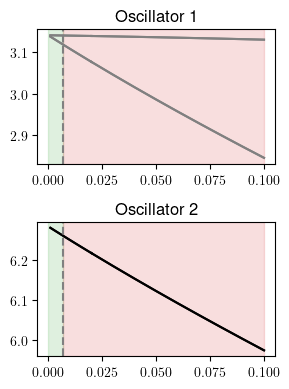

In [216]:
quick_plot_combined(a21_p001,
                    kw_f={'data_list':data_p001_list},
                    kw_r3d={'data_list':data_r3d_p001_list},
                    kw_r={'etup':etup21})

## Sims

In [217]:
eps21_p001 = 0.1
th_init21_p001 = 3

In [218]:
dt = .01;T_p001=500
t21_p001 = np.arange(0,T_p001,dt)
args21_p001 = {'args':(a21_p001,eps21_p001,del21_p001),
               't_eval':t21_p001,**kw_sim}

In [219]:
y0a = a21_p001.system1.lc['dat'][int((th_init21_p001/(2*np.pi)) * a21_p001.system1.TN),:]
y0b = a21_p001.system2.lc['dat'][int((0/(2*np.pi)) * a21_p001.system2.TN),:]

y0_p001 = np.array([y0a,y0b]).flatten()

solf21_p001 = solve_ivp(_full,[0,t21_p001[-1]],
                        y0_p001, **args21_p001)

In [220]:
solr21_p001 = solve_ivp(_redu_c,[0,t21_p001[-1]],
                        [th_init21_p001],**args21_p001)

In [221]:
# solr12b_p001 = solve_ivp(_redu_3dc,[0,t21_p001[-1]],
#                     [th_init21_p001,0,0],**args21_p001)

In [222]:
tp12a_p001, phasea21_p001 = get_phase(t21_p001,solf21_p001.y.T[:,:4],
                            skipn=50,system1=a21_p001.system1)
tp12b_p001, phaseb21_p001 = get_phase(t21_p001,solf21_p001.y.T[:,4:],
                            skipn=50,system1=a21_p001.system2)

### Plot

(-0.5, 6.783185307179586)

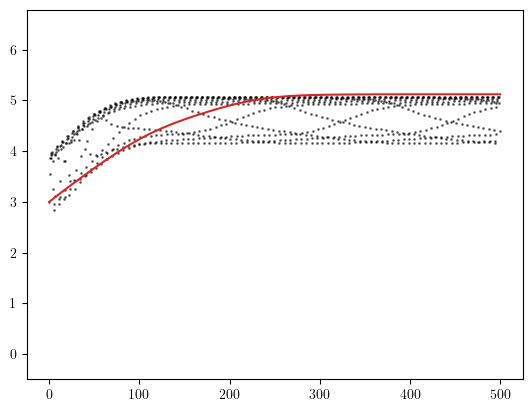

In [223]:
fig,axs = plt.subplots()
y = np.mod(phasea21_p001 - a21_p001.om*phaseb21_p001,2*np.pi)
axs.scatter(tp12a_p001,y,s=1,alpha=.5,color='black')

axs.plot(t21_p001,np.mod(solr21_p001.y.T,2*np.pi),color='tab:red')

# axs.plot(t21_p001*a21_p001.om,np.mod(solr12b_p001.y[0]-a21_p001.om*solr12b_p001.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.005

In [224]:
del21_p005 = .005
a21_p005 = nm.nmCoupling(**kw_nm, del1=1*del21_p005)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


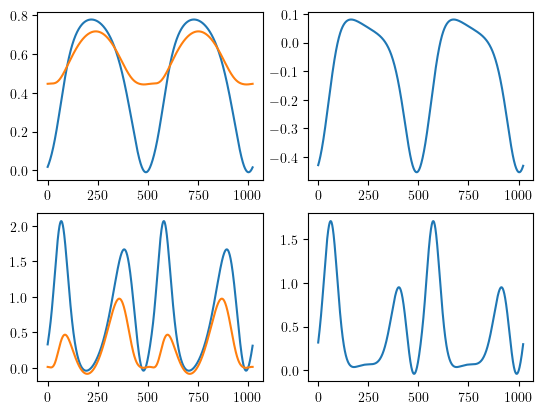

In [225]:
fig,axs = plt.subplots(2,2)
axs[0,0].plot(a21_p005.system1.h['dat'][0])
axs[0,0].plot(a21_p005.system2.h['dat'][0])

axs[0,1].plot(a21_p005.system1.h['dat'][0]-a21_p005.system2.h['dat'][0])

axs[1,0].plot(a21_p005.system1.h['dat'][1])
axs[1,0].plot(a21_p005.system2.h['dat'][1])

axs[1,1].plot(a21_p005.system1.h['dat'][1]-a21_p005.system2.h['dat'][1])

## Get Branches Full

In [226]:
kw_p005 = {'a':a21_p005,'del1':del21_p005,'bifdir':'bif1d_thal2/',
            '_full_rhs':_full}

In [227]:
data_p005_list = []

In [228]:
in_dicts = [dict(init=4,eps_init=0.03,eps_final=0.0005,deps=-.001),
            dict(init=4,eps_init=0.03,eps_final=0.11,deps=.01)]

In [229]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p005)
    data_p005_list.append(dat)
fname = kw_p005['bifdir']+'hyper_thal2_21_p005.txt'

fname1 td_branch_init=4_nm=21_del=0.005_ei=0.03_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=4_nm=21_del=0.005_ei=0.03_ef=0.0005_de=-0.001.txt
fname1 td_branch_init=4_nm=21_del=0.005_ei=0.03_ef=0.11_de=0.01.txt
fname2 ts_branch_init=4_nm=21_del=0.005_ei=0.03_ef=0.11_de=0.01.txt


In [230]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [231]:
data_r3d_p005_list = []

In [232]:
# find init for this branch
_,init = phase_lock_r3d([4,0,0],a21_p005,.05,_redu_3dc)
print(init)

t_diff 4.30948898658917313, Y=[ 4.30948899  0.10148099 -0.25132254]                                              
[ 4.3095  0.1015 -0.2513]


In [233]:
# top 1f
dat = follow_locking_3d(init,a21_p005,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p005_list.append(dat)

In [234]:
# top 1b
dat = follow_locking_3d(init,a21_p005,(.05,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p005_list.append(dat)

## Plot

eps_min 0.004999999999999977


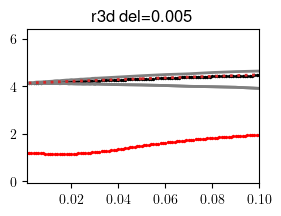

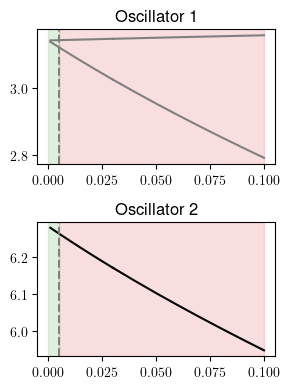

In [235]:
quick_plot_combined(a21_p005,
                    kw_f={'data_list':data_p005_list},
                    kw_r3d={'data_list':data_r3d_p005_list},
                    kw_r={'etup':etup21})

## Sims

In [236]:
eps21_p005 = 0.03
th_init21_p005 = 4

In [237]:
dt = .01;T_p005=1000
t21_p005 = np.arange(0,T_p005,dt)
args21_p005 = {'args':(a21_p005,eps21_p005,del21_p005),
               't_eval':t21_p005,**kw_sim}

In [238]:
idx1 = int((th_init21_p005/(2*np.pi)) * a21_p005.system1.TN)
idx2 = int((0/(2*np.pi)) * a21_p005.system2.TN)
y0a = a21_p005.system1.lc['dat'][idx1,:]
y0b = a21_p005.system2.lc['dat'][idx2,:]

y0_p005 = np.array([y0a,y0b]).flatten()

y0_p005 = [-0.04927935,  0.25607329,  0.23519937,  0.43848521,
           -0.65756348,  0.27999029,  0.2144742,   0.0406402]

solf21_p005 = solve_ivp(_full,[0,t21_p005[-1]],
                        y0_p005, **args21_p005)

In [239]:
solr21_p005 = solve_ivp(_redu_c,[0,t21_p005[-1]],
                        [th_init21_p005],**args21_p005)

In [240]:
# solr12b_p005 = solve_ivp(_redu_3dc,[0,t21_p005[-1]],
#                     [th_init21_p005,0,0],**args21_p005)

In [241]:
tp12a_p005, phasea21_p005 = get_phase(t21_p005,solf21_p005.y.T[:,:4],
                            skipn=50,system1=a21_p005.system1)
tp12b_p005, phaseb21_p005 = get_phase(t21_p005,solf21_p005.y.T[:,4:],
                            skipn=50,system1=a21_p005.system2)

### Plot

(-0.5, 6.783185307179586)

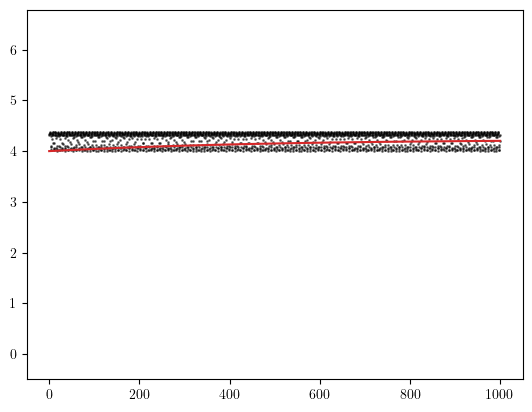

In [242]:
fig,axs = plt.subplots()
y = np.mod(phasea21_p005 - a21_p005.om*phaseb21_p005,2*np.pi)
axs.scatter(tp12a_p005,y,s=1,alpha=.5,color='black')

axs.plot(t21_p005,np.mod(solr21_p005.y.T,2*np.pi),color='tab:red')

# axs.plot(t21_p005*a21_p005.om,np.mod(solr12b_p005.y[0]-a21_p005.om*solr12b_p005.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.008

In [243]:
del21_p008 = .008
a21_p008 = nm.nmCoupling(**kw_nm, del1=1*del21_p008)

pfactor 20
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H thal0_35, order=0...
* Loading H thal1_35, order=0...
* Loading H thal0_35, order=1...
* Loading H thal1_35, order=1...
* Loading H thal0_35, order=2...
* Loading H thal1_35, order=2...
* Loading H thal0_35, order=3...
* Loading H thal1_35, order=3...


## Get Branches Full

In [244]:
kw_p008 = {'a':a21_p008,'del1':del21_p008,'bifdir':'bif1d_thal2/',
            '_full_rhs':_full,'recompute':False,'max_time':10000}

In [245]:
data_p008_list = []

In [246]:
in_dicts = [dict(init=3,eps_init=0.05,eps_final=0.0005,deps=-.002)]

In [247]:
for i in range(len(in_dicts)):
    in1 = in_dicts[i]
    dat = follow_phase_diffs(**in1,**kw_p008)
    data_p008_list.append(dat)
fname = kw_p008['bifdir']+'hyper_thal2_21_p008.txt'

fname1 td_branch_init=3_nm=21_del=0.008_ei=0.05_ef=0.0005_de=-0.002.txt
fname2 ts_branch_init=3_nm=21_del=0.008_ei=0.05_ef=0.0005_de=-0.002.txt


In [248]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts),4])
for i in range(len(in_dicts)):
    hyp_inputs[i,0] = in_dicts[i]['init']
    hyp_inputs[i,1] = in_dicts[i]['eps_init']
    hyp_inputs[i,2] = in_dicts[i]['eps_final']
    hyp_inputs[i,3] = in_dicts[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [144]:
data_r3d_p008_list = []

In [145]:
# find init for this branch
_,init = phase_lock_r3d([3,0,0],a21_p008,.1,_redu_3dc)
print(init)

t_diff 2.92108776379122711, Y=[ 2.92108776  0.00881503 -0.24786734]                                              
[ 2.9211  0.0088 -0.2479]


In [146]:
# top 1b
dat = follow_locking_3d(init,a21_p008,(.1,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p008_list.append(dat)

eps iter 0 0.1                
t_diff 2.92108776379123421, Y=[ 2.92108776  0.00881503 -0.24786734]                                              
eps iter 1 0.099                
t_diff 2.92032419156396314, Y=[ 2.92032419  0.00907583 -0.2456708 ]                                              
eps iter 2 0.098                
t_diff 2.91955909554291414, Y=[ 2.9195591   0.00933095 -0.24346981]                                              
eps iter 3 0.097                
t_diff 2.91879246053708564, Y=[ 2.91879246  0.00958034 -0.24126435]                                              
eps iter 4 0.096                
t_diff 2.91802427399476514, Y=[ 2.91802427  0.00982397 -0.23905438]                                              
eps iter 5 0.095                
t_diff 2.91725452046899354, Y=[ 2.91725452  0.01006179 -0.23683988]                                              
eps iter 6 0.094                
t_diff 2.91648318569224064, Y=[ 2.91648319  0.01029379 -0.23462082]                    

## Plot

eps_min 0.003999999999999986


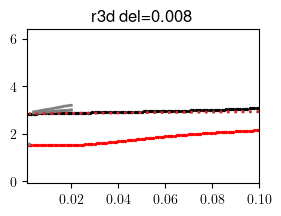

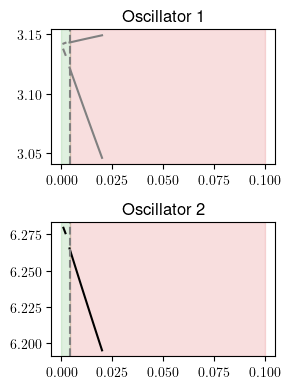

In [157]:
quick_plot_combined(a21_p008,
                    kw_f={'data_list':data_p008_list},
                    kw_r3d={'data_list':data_r3d_p008_list},
                    kw_r={'etup':etup21})

## Sims

In [160]:
eps21_p008 = 0.025
th_init21_p008 = 0

In [161]:
dt = .01;T_p008=5000
t21_p008 = np.arange(0,T_p008,dt)
args21_p008 = {'args':(a21_p008,eps21_p008,del21_p008),
               't_eval':t21_p008,**kw_sim,'dense_output':True}

In [162]:
y0a = a21_p008.system1.lc['dat'][int((th_init21_p008/(2*np.pi)) * a21_p008.system1.TN),:]
y0b = a21_p008.system2.lc['dat'][int((0/(2*np.pi)) * a21_p008.system2.TN),:]

y0_p008 = np.array([y0a,y0b]).flatten()

solf21_p008 = solve_ivp(_full,[0,t21_p008[-1]],
                        y0_p008, **args21_p008)

In [163]:
solr21_p008 = solve_ivp(_redu_c,[0,t21_p008[-1]],
                        [th_init21_p008],**args21_p008)

In [164]:
# solr12b_p008 = solve_ivp(_redu_3dc,[0,t21_p008[-1]],
#                     [th_init21_p008,0,0],**args21_p008)

In [165]:
tp12a_p008, phasea21_p008 = get_phase(t21_p008,solf21_p008.y.T[:,:4],
                            skipn=500,system1=a21_p008.system1)
tp12b_p008, phaseb21_p008 = get_phase(t21_p008,solf21_p008.y.T[:,4:],
                            skipn=500,system1=a21_p008.system2)

### Plot

(-0.5, 6.783185307179586)

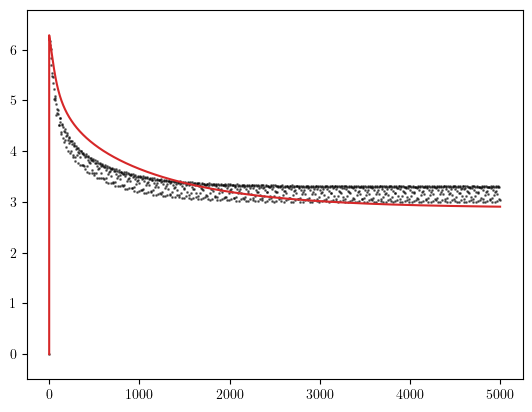

In [166]:
fig,axs = plt.subplots()
y = np.mod(phasea21_p008 - a21_p008.om*phaseb21_p008,2*np.pi)
axs.scatter(tp12a_p008,y,s=1,alpha=.5,color='black')

axs.plot(t21_p008,np.mod(solr21_p008.y.T,2*np.pi),color='tab:red')

# axs.plot(t21_p008*a21_p008.om,np.mod(solr12b_p008.y[0]-a21_p008.om*solr12b_p008.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

(250.0, 350.0)

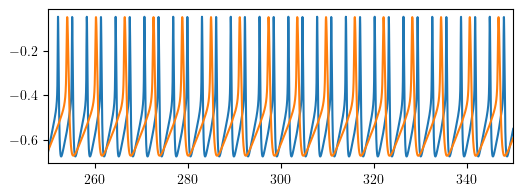

In [167]:
fig,axs = plt.subplots(figsize=(6,2))
axs.plot(solf21_p008.t,solf21_p008.y.T[:,0])
axs.plot(solf21_p008.t,solf21_p008.y.T[:,4])
axs.set_xlim(250,350)

In [168]:
transient=.5;width=10;prm=.05

t1 = get_period(solf21_p008,idx=0)
t2 = get_period(solf21_p008,idx=0,idx_shift=1)
print(t1,t2)

(3.1510948340728646, 4994.801955384078) (3.0228290907862174, 4997.824784474864)


# del=0.01

In [ ]:
del21_p01 = .01
a21_p01 = nm.nmCoupling(**kw_nm, del1=1*del21_p01)

In [ ]:
fig,axs = plt.subplots(3,2)
axs[0,0].plot(a21_p01.system1.h['dat'][0])
axs[0,0].plot(a21_p01.system2.h['dat'][0])

axs[0,1].plot(a21_p01.system1.h['dat'][0]-a21_p01.system2.h['dat'][0])

axs[1,0].plot(a21_p01.system1.h['dat'][1])
axs[1,0].plot(a21_p01.system2.h['dat'][1])

axs[1,1].plot(a21_p01.system1.h['dat'][1]-a21_p01.system2.h['dat'][1])

## Get Branches Full

In [ ]:
kw_p01 = {'a':a21_p01,'del1':del21_p01,'bifdir':'bif1d_thal2/',
            '_full_rhs':_full}

In [ ]:
data_p01_list = []

In [ ]:
# # top 1b
# dat = follow_phase_diffs(init=2,eps_init=0.02,eps_final=0.001,
#                          deps=-.005,**kw_p01)
# data_p01_list.append(dat)

In [ ]:
# # top 1f
# dat = follow_phase_diffs(init=2,eps_init=0.02,eps_final=0.31,
#                          deps=.01,**kw_p01)
# data_p01_list.append(dat)

In [ ]:
# # bot 1b
# dat = follow_phase_diffs(init=0,eps_init=0.025,eps_final=0.001,
#                          deps=-.005,**kw_p01)
# data_p01_list.append(dat)

In [ ]:
# # top 1f
# dat = follow_phase_diffs(init=0,eps_init=0.025,eps_final=0.31,
#                          deps=.01,**kw_p01)
# data_p01_list.append(dat)

## Get Branches 3D

In [ ]:
data_r3d_p01_list = []

In [ ]:
# # find init for this branch
# _,init = phase_lock_r3d([.5,0,0],a21_p01,.1,_redu_3dc)
# print(init)

In [ ]:
# # top 1f
# dat = follow_locking_3d(init,a21_p01,(.1,.31,.01),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p01_list.append(dat)

In [ ]:
# # top 1b
# dat = follow_locking_3d(init,a21_p01,(.1,.001,-.01),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p01_list.append(dat)

## Plot

In [ ]:
quick_plot_combined(a21_p01,
                    #kw_f={'data_list':data_p01_list},
                    #kw_r3d={'data_list':data_r3d_p01_list},
                    kw_r={'etup':etup21})

## Sims

In [ ]:
eps21_p01 = 0.1
th_init21_p01 = 3

In [ ]:
dt = .01;T_p01=2000
t21_p01 = np.arange(0,T_p01,dt)
args21_p01 = {'args':(a21_p01,eps21_p01,del21_p01),
               't_eval':t21_p01,**kw_sim}

In [ ]:
y0a = a21_p01.system1.lc['dat'][int((th_init21_p01/(2*np.pi)) * a21_p01.system1.TN),:]
y0b = a21_p01.system2.lc['dat'][int((0/(2*np.pi)) * a21_p01.system2.TN),:]

y0_p01 = np.array([y0a,y0b]).flatten()

solf21_p01 = solve_ivp(_full,[0,t21_p01[-1]],
                        y0_p01, **args21_p01)

In [ ]:
solr21_p01 = solve_ivp(_redu_c,[0,t21_p01[-1]],
                        [th_init21_p01],**args21_p01)

In [ ]:
# solr12b_p01 = solve_ivp(_redu_3dc,[0,t21_p01[-1]],
#                     [th_init21_p01,0,0],**args21_p01)

In [ ]:
tp12a_p01, phasea21_p01 = get_phase(t21_p01,solf21_p01.y.T[:,:4],
                            skipn=50,system1=a21_p01.system1)
tp12b_p01, phaseb21_p01 = get_phase(t21_p01,solf21_p01.y.T[:,4:],
                            skipn=50,system1=a21_p01.system2)

In [ ]:
fig,axs = plt.subplots()
y = np.mod(phasea21_p01 - a21_p01.om*phaseb21_p01,2*np.pi)
axs.scatter(tp12a_p01,y,s=1,alpha=.5,color='black')

axs.plot(t21_p01,np.mod(solr21_p01.y.T,2*np.pi),color='tab:red')

# axs.plot(t21_p01*a21_p01.om,np.mod(solr12b_p01.y[0]-a21_p01.om*solr12b_p01.y[2],2*np.pi),color='tab:blue')

#axs.plot(t12*a12.om,np.mod(solr12c.y[0]-a12.om*solr12c.y[2],2*np.pi),color='tab:green')
#axs.scatter(sol_full.t[::skipn],np.mod(phase2,1),s=1)

axs.set_ylim(-.5,2*np.pi+.5)

In [ ]:
fig,axs = plt.subplots(figsize=(6,2))
axs.plot(solf21_p01.t,solf21_p01.y.T[:,0])
axs.plot(solf21_p01.t,solf21_p01.y.T[:,4])
axs.set_xlim(250,350)